In [1]:
lines = open("markov_out.txt").readlines()[3:]

In [3]:
lines = list(map(str.strip, lines))

In [5]:
all_ars = list(map(
    lambda line: float(line.split(" ")[0]),
    lines
))
all_ars[:5]

[0.027706476503459095,
 0.03659395912135917,
 0.03962069752716364,
 0.04656497072916033,
 0.04336646946056154]

In [13]:
all_params = map(
    lambda line: line.split("(")[1][:-1].split(","),
    lines
)
all_params = list(map(
    lambda pair: (int(pair[0]), float(pair[1])),
    all_params
))
all_params[:5]

[(20, 0.1),
 (20, 0.14444444444444446),
 (20, 0.18888888888888888),
 (20, 0.23333333333333334),
 (20, 0.2777777777777778)]

In [14]:
from collections import defaultdict as ddict

In [16]:
horizon_ars = ddict(list)
for (horizon, _), ars in zip(all_params, all_ars):
    horizon_ars[horizon].append(ars)

In [18]:
thresh_ars = ddict(list)
for (_, thresh), ars in zip(all_params, all_ars):
    thresh_ars[thresh].append(ars)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Markov Random Walk Horizon')

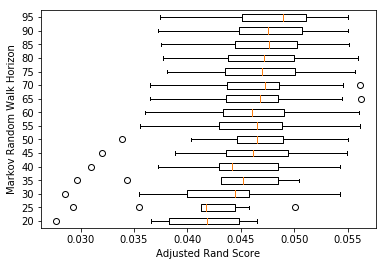

In [28]:
plt.boxplot(
    horizon_ars.values(), 
    labels=horizon_ars.keys(), 
    vert=False);
plt.xlabel("Adjusted Rand Score")
plt.ylabel("Markov Random Walk Horizon")

Text(0,0.5,'Mask Probability Threshold')

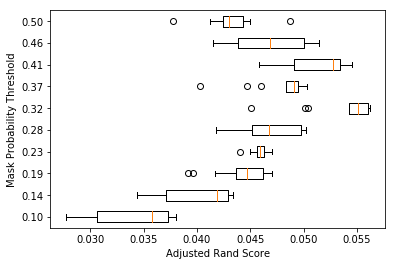

In [29]:
plt.boxplot(
    thresh_ars.values(), 
    labels=["{:.02f}".format(thresh) for thresh in thresh_ars.keys()], 
    vert=False);
plt.xlabel("Adjusted Rand Score")
plt.ylabel("Mask Probability Threshold")